In [29]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,as_frame=False,parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
X , y = mnist['data'], mnist['target']

In [31]:
X.shape

(70000, 784)

In [32]:
y.shape

(70000,)

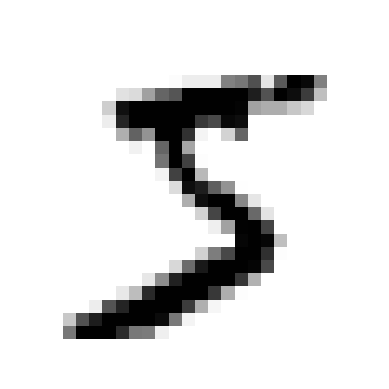

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")
plt.savefig("some_digit_plot")
plt.show()

In [35]:
y[0]

'5'

In [37]:
import numpy as np
y = y.astype(np.uint8)

In [38]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [39]:
# Binary Classifier for 5's
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [40]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [49]:
sgd_clf.predict(X[0].reshape(1,-1))

array([ True])

In [59]:
# Implementing Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
# skfolds.split performs stratified sampling based on y_train_5 values so that proportional
#  number of actual 5's are present in each fold
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # train and test indices are lists containing the proper folds/groupings from 
    # stratified sampling
    print("Train index: ", train_index, " Test Index: ", test_index)
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)

    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))


Train index:  [    1     3     4 ... 59994 59996 59998]  Test Index:  [    0     2     6 ... 59995 59997 59999]
0.9669
Train index:  [    0     2     3 ... 59997 59998 59999]  Test Index:  [    1    10    11 ... 59988 59989 59991]
0.91625
Train index:  [    0     1     2 ... 59995 59997 59999]  Test Index:  [    3     4     5 ... 59994 59996 59998]
0.96785


In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])